In [26]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("resources/HistoricalData/CountyLevelSummary.csv")

In [28]:
df.reset_index(inplace=True, drop=True)

In [29]:
df = df.drop(["Unnamed: 0", "Year"], axis=1)

In [30]:
df.head()

,County,TotalPop,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,EstHouseholds,Net_Migration,Immigration,Domestic_Migration,Interest_Rate
0,Alameda,1284782,35264,589348,29262,226,229890.0,483745.0,3684.0,8600.0,-4916.0,9.34
1,Alameda,1302709,37575,580372,30739,2652,223200.0,485019.0,5100.0,8716.0,-3616.0,8.11
2,Alameda,1318127,38998,581604,31202,3049,217370.0,488485.0,-432.0,9436.0,-9868.0,7.13
3,Alameda,1327526,38190,582410,32175,2617,210010.0,492503.0,-5262.0,7689.0,-12951.0,7.49
4,Alameda,1333031,41139,604087,33263,3515,207880.0,495897.0,-6877.0,6344.0,-13221.0,7.85


In [31]:
df_alameda = df.loc[df["County"] =="Alameda"]

In [32]:
df_alameda.head()

,County,TotalPop,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,EstHouseholds,Net_Migration,Immigration,Domestic_Migration,Interest_Rate
0,Alameda,1284782,35264,589348,29262,226,229890.0,483745.0,3684.0,8600.0,-4916.0,9.34
1,Alameda,1302709,37575,580372,30739,2652,223200.0,485019.0,5100.0,8716.0,-3616.0,8.11
2,Alameda,1318127,38998,581604,31202,3049,217370.0,488485.0,-432.0,9436.0,-9868.0,7.13
3,Alameda,1327526,38190,582410,32175,2617,210010.0,492503.0,-5262.0,7689.0,-12951.0,7.49
4,Alameda,1333031,41139,604087,33263,3515,207880.0,495897.0,-6877.0,6344.0,-13221.0,7.85


In [33]:
df_new = df_alameda[["Avg.Median Home price","Immigration","Employers", "Employees","AvgAnnualPay","New Homes Constructed","EstHouseholds"]]

In [34]:
scatter_matrix(df_new, alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19847c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a6180b8>]], dtype=object)

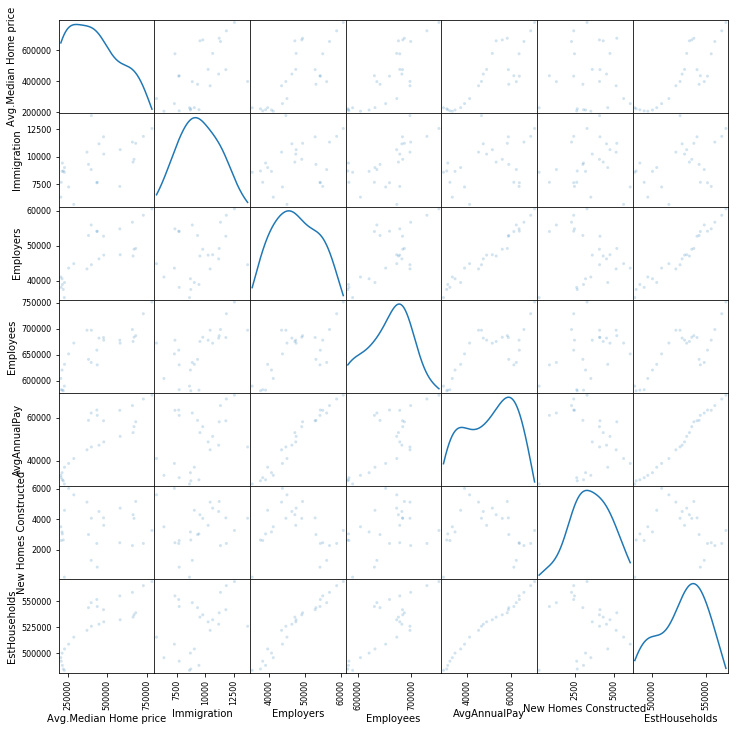

In [35]:
plt.show()

In [36]:
df_new.corr()

,Avg.Median Home price,Immigration,Employers,Employees,AvgAnnualPay,New Homes Constructed,EstHouseholds
Avg.Median Home price,1.000000,0.569903,0.783928,0.824421,0.848847,0.052245,0.851533
Immigration,0.569903,1.000000,0.337075,0.614992,0.403226,0.111774,0.422113
Employers,0.783928,0.337075,1.000000,0.711834,0.979868,-0.170805,0.975713
Employees,0.824421,0.614992,0.711834,1.000000,0.745824,0.352906,0.803312
AvgAnnualPay,0.848847,0.403226,0.979868,0.745824,1.000000,-0.144711,0.991875
New Homes Constructed,0.052245,0.111774,-0.170805,0.352906,-0.144711,1.000000,-0.074856
EstHouseholds,0.851533,0.422113,0.975713,0.803312,0.991875,-0.074856,1.000000


In [37]:
Final_df = df_new[["Avg.Median Home price", "AvgAnnualPay","EstHouseholds", "Employees"]]

In [38]:
Final_df.head()

,Avg.Median Home price,AvgAnnualPay,EstHouseholds,Employees
0,229890.0,29262,483745.0,589348
1,223200.0,30739,485019.0,580372
2,217370.0,31202,488485.0,581604
3,210010.0,32175,492503.0,582410
4,207880.0,33263,495897.0,604087


In [39]:
scatter_matrix(Final_df, alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a88ce80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1add8588>]], dtype=object)

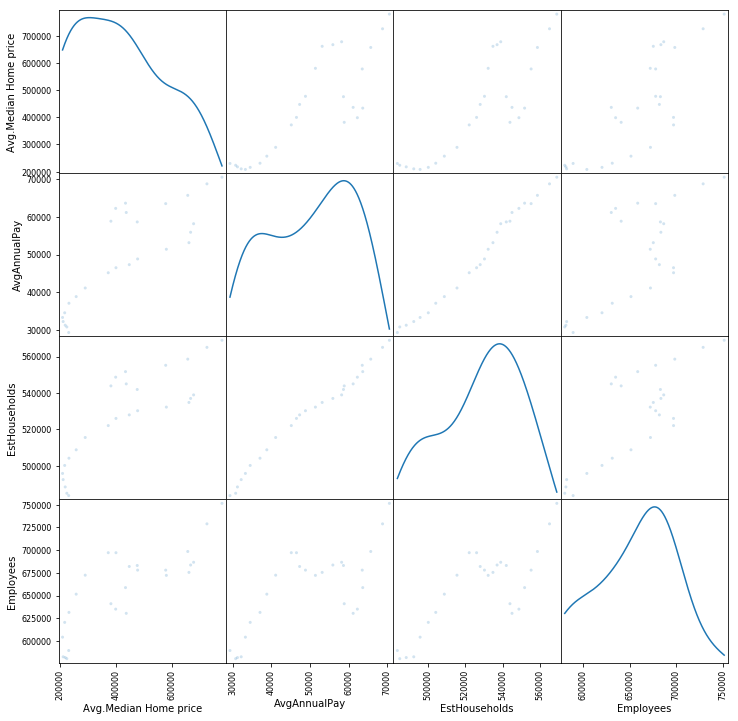

In [40]:
plt.show()

In [41]:
Final_df.corr()

,Avg.Median Home price,AvgAnnualPay,EstHouseholds,Employees
Avg.Median Home price,1.000000,0.848847,0.851533,0.824421
AvgAnnualPay,0.848847,1.000000,0.991875,0.745824
EstHouseholds,0.851533,0.991875,1.000000,0.803312
Employees,0.824421,0.745824,0.803312,1.000000


# Linear Regression Model

## Build multi-variate Linear regression model,

    Dependent Variable = Avg.Median Home price	
    Predictor Variables/Features = Employees, EstHouseholds

In [42]:
# Assign the data to X and y

X = Final_df[["Employees", "EstHouseholds"]]
y = Final_df["Avg.Median Home price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(26, 2) (26, 1)


In [71]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

### END SOLUTION

In [72]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [73]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7733808061391461
Testing Score: 0.7740455952272238


In [61]:
### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[ 1.51180453  4.09079205]]
y-axis intercept:  [-2720177.39031653]


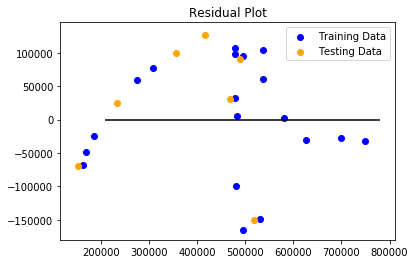

In [57]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION